<a href="https://colab.research.google.com/github/dylanthesweetpotato/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DISNEY_BUILD_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

import os
import sys
this_dir = os.path.dirname(os.getcwd())
sys.path.insert(0, this_dir)
%pip install cpi
df = pd.read_csv('https://query.data.world/s/oc2gl67xgbk7bc7guoruzd4rdclnyt')

In [10]:
df.tail(5)

,rank,title,studio,lifetime_gross,year
16537,16538,Dog Eat Dog,IFC,80,2009
16538,16539,Paranoid Girls,NaN,78,2015
16539,16540,Confession of a Child of the Century,Cohen,74,2015
16540,16541,Storage 24,Magn.,72,2013
16541,16542,Zyzzyx Road,Reg.,30,2006


In [0]:
#adding to dataframe to make it in date
df = df.append({'rank' : 16543 , 'title' : 'Frozen II', 'studio' : 'BV' , 'lifetime_gross' : 450439533, 'year' : 2019   } , ignore_index=True)

In [0]:
df = df.append({'rank' : 16544 , 'title' : 'Star Wars: The Rise Of Skywaler', 'studio' : 'BV' , 'lifetime_gross' : 451582256, 'year' : 2019   } , ignore_index=True)

In [0]:
df = df.append({'rank' : 16545 , 'title' : 'Joker', 'studio' : 'Warner' , 'lifetime_gross' : 333985454, 'year' : 2019   } , ignore_index=True)

In [14]:
df.isnull().sum()

rank               0
title              0
studio            36
lifetime_gross     0
year               0
dtype: int64

In [15]:
import cpi
cpi.inflate(100, 1950)

1041.9377593360996

In [16]:
cpi.inflate(25, 1950, to=2018)

260.4844398340249

In [17]:
df.head()

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avengers: Endgame,BV,857190335,2019
2,3,Avatar,Fox,760507625,2009
3,4,Black Panther,BV,700059566,2018
4,5,Avengers: Infinity War,BV,678815482,2018


In [18]:
df['year'].astype(int)

0        2015
1        2019
2        2009
3        2018
4        2018
         ... 
16540    2013
16541    2006
16542    2019
16543    2019
16544    2019
Name: year, Length: 16545, dtype: int64

In [19]:
df['lifetime_gross'].astype(int)

0        936662225
1        857190335
2        760507625
3        700059566
4        678815482
           ...    
16540           72
16541           30
16542    450439533
16543    451582256
16544    333985454
Name: lifetime_gross, Length: 16545, dtype: int64

In [20]:

m2019 = df[df['year'] == 2019]
m2019.columns = ["rank", "title", 'studio', "lifetime_gross", "year"]
m2019.head()

,rank,title,studio,lifetime_gross,year
1,2,Avengers: Endgame,BV,857190335,2019
20,21,Captain Marvel,BV,426829839,2019
30,31,Toy Story 4,BV,404979743,2019
32,33,The Lion King (2019),BV,403748078,2019
49,50,Spider-Man: Far from Home,Sony,354788925,2019


In [21]:
m2019.head(10)

,rank,title,studio,lifetime_gross,year
1,2,Avengers: Endgame,BV,857190335,2019
20,21,Captain Marvel,BV,426829839,2019
30,31,Toy Story 4,BV,404979743,2019
32,33,The Lion King (2019),BV,403748078,2019
49,50,Spider-Man: Far from Home,Sony,354788925,2019
53,54,Aladdin (2019),BV,348926592,2019
273,274,Us,Uni.,175005930,2019
292,293,John Wick: Chapter 3 - Parabellum,LG/S,169935857,2019
326,327,How to Train Your Dragon: The Hidden World,Uni.,160799505,2019
346,347,The Secret Life of Pets 2,Uni.,154899025,2019


In [22]:
m2018 = df[df['year'] < 2019 ]
m2018.columns = ["rank", "title", 'studio', "lifetime_gross", "year"]
m2018.head()

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
2,3,Avatar,Fox,760507625,2009
3,4,Black Panther,BV,700059566,2018
4,5,Avengers: Infinity War,BV,678815482,2018
5,6,Titanic,Par.,659363944,1997


In [0]:
df['Inflated_gross'] = m2018.apply(lambda x: cpi.inflate(x.lifetime_gross, x.year), axis=1)


In [24]:
df.head(50)

,rank,title,studio,lifetime_gross,year,Inflated_gross
0,1,Star Wars: The Force Awakens,BV,936662225,2015,9.923442e+08
1,2,Avengers: Endgame,BV,857190335,2019,NaN
2,3,Avatar,Fox,760507625,2009,8.901438e+08
3,4,Black Panther,BV,700059566,2018,7.000596e+08
4,5,Avengers: Infinity War,BV,678815482,2018,6.788155e+08
5,6,Titanic,Par.,659363944,1997,1.031594e+09
6,7,Jurassic World,Uni.,652270625,2015,6.910463e+08
7,8,Marvel's The Avengers,BV,623357910,2012,6.817667e+08
8,9,Star Wars: The Last Jedi,BV,620181382,2017,6.353292e+08
9,10,Incredibles 2,BV,608581744,2018,6.085817e+08


In [0]:
 def fx(x):
    if np.isnan(x['Inflated_gross']):
        return x['lifetime_gross']
    else:
        return x['Inflated_gross']

df['Inflated_gross']=df.apply(lambda x : fx(x),axis=1)

In [26]:
df.head()

,rank,title,studio,lifetime_gross,year,Inflated_gross
0,1,Star Wars: The Force Awakens,BV,936662225,2015,9.923442e+08
1,2,Avengers: Endgame,BV,857190335,2019,8.571903e+08
2,3,Avatar,Fox,760507625,2009,8.901438e+08
3,4,Black Panther,BV,700059566,2018,7.000596e+08
4,5,Avengers: Infinity War,BV,678815482,2018,6.788155e+08


In [0]:
#I DID IT 

In [0]:
df= df[df['Inflated_gross'] > 250000000 ]

In [29]:
df.describe()

,rank,lifetime_gross,year,Inflated_gross
count,325.000000,3.250000e+02,325.000000,3.250000e+02
mean,593.307692,2.318410e+08,1993.209231,4.462872e+08
std,1665.328012,1.443431e+08,19.847239,3.265422e+08
min,1.000000,1.636188e+07,1937.000000,2.500215e+08
25%,82.000000,1.192854e+08,1979.000000,2.954476e+08
50%,174.000000,2.175812e+08,1999.000000,3.539107e+08
75%,587.000000,3.093062e+08,2010.000000,4.611001e+08
max,16545.000000,9.366622e+08,2019.000000,3.628452e+09


In [0]:
df=df[df['year'] > 1950 ]

In [31]:
df.describe()

,rank,lifetime_gross,year,Inflated_gross
count,314.000000,3.140000e+02,314.000000,3.140000e+02
mean,548.076433,2.372611e+08,1994.990446,4.179496e+08
std,1655.962753,1.433787e+08,17.698303,2.032123e+08
min,1.000000,3.200000e+07,1952.000000,2.500215e+08
25%,79.250000,1.285631e+08,1980.000000,2.951837e+08
50%,168.000000,2.197894e+08,2000.000000,3.536920e+08
75%,510.250000,3.119942e+08,2010.000000,4.506382e+08
max,16545.000000,9.366622e+08,2019.000000,1.910228e+09


In [0]:
df['disney'] = (df['studio'] == 'BV')


In [33]:
df.head()

,rank,title,studio,lifetime_gross,year,Inflated_gross,disney
0,1,Star Wars: The Force Awakens,BV,936662225,2015,9.923442e+08,True
1,2,Avengers: Endgame,BV,857190335,2019,8.571903e+08,True
2,3,Avatar,Fox,760507625,2009,8.901438e+08,False
3,4,Black Panther,BV,700059566,2018,7.000596e+08,True
4,5,Avengers: Infinity War,BV,678815482,2018,6.788155e+08,True


In [0]:
df= df[df['Inflated_gross'] > 250000000 ]

In [0]:
df=df[df['year'] > 1975 ]

In [0]:
df['disneyV'] = df['disney'].astype(int)

In [37]:
df.head(20)

,rank,title,studio,lifetime_gross,year,Inflated_gross,disney,disneyV
0,1,Star Wars: The Force Awakens,BV,936662225,2015,9.923442e+08,True,1
1,2,Avengers: Endgame,BV,857190335,2019,8.571903e+08,True,1
2,3,Avatar,Fox,760507625,2009,8.901438e+08,False,0
3,4,Black Panther,BV,700059566,2018,7.000596e+08,True,1
4,5,Avengers: Infinity War,BV,678815482,2018,6.788155e+08,True,1
5,6,Titanic,Par.,659363944,1997,1.031594e+09,False,0
6,7,Jurassic World,Uni.,652270625,2015,6.910463e+08,False,0
7,8,Marvel's The Avengers,BV,623357910,2012,6.817667e+08,True,1
8,9,Star Wars: The Last Jedi,BV,620181382,2017,6.353292e+08,True,1
9,10,Incredibles 2,BV,608581744,2018,6.085817e+08,True,1


In [38]:
#IMPORTANT
disneyrise = pd.crosstab(df['year'], df['disneyV'])
disneyrise.head(5)

disneyV,0,1
year,,
1976,4,0
1977,5,0
1978,7,0
1979,8,0
1980,4,0


In [0]:
dfD= df[df['studio'] == 'BV' ]

In [40]:
dfD.head()

,rank,title,studio,lifetime_gross,year,Inflated_gross,disney,disneyV
0,1,Star Wars: The Force Awakens,BV,936662225,2015,9.923442e+08,True,1
1,2,Avengers: Endgame,BV,857190335,2019,8.571903e+08,True,1
3,4,Black Panther,BV,700059566,2018,7.000596e+08,True,1
4,5,Avengers: Infinity War,BV,678815482,2018,6.788155e+08,True,1
7,8,Marvel's The Avengers,BV,623357910,2012,6.817667e+08,True,1


In [41]:
dfO= df[df['studio'] != 'BV' ]
dfO.head()

,rank,title,studio,lifetime_gross,year,Inflated_gross,disney,disneyV
2,3,Avatar,Fox,760507625,2009,8.901438e+08,False,0
5,6,Titanic,Par.,659363944,1997,1.031594e+09,False,0
6,7,Jurassic World,Uni.,652270625,2015,6.910463e+08,False,0
10,11,The Dark Knight,WB,535234033,2008,6.242412e+08,False,0
14,15,Star Wars: Episode I - The Phantom Menace,Fox,474544677,1999,7.152550e+08,False,0


In [0]:
disneygross = dfD['Inflated_gross'].groupby(dfD['year']) 
dpy = disneygross.sum()

In [0]:
notdisneygross = dfO['Inflated_gross'].groupby(dfO['year']) 
npy = notdisneygross.sum()

In [0]:
dpy2 = pd.DataFrame(dpy)

In [45]:
dpy2.head()

,Inflated_gross
year,
1987,6.447953e+08
1988,3.320903e+08
1989,2.647238e+08
1990,3.427625e+08
1991,4.037027e+08


In [0]:
dpy2.columns =['DisneyGross'] 

In [47]:
dpy2.head()

,DisneyGross
year,
1987,6.447953e+08
1988,3.320903e+08
1989,2.647238e+08
1990,3.427625e+08
1991,4.037027e+08


In [48]:
dpy2.reset_index(level=0, inplace=True)
dpy2.head()


,year,DisneyGross
0,1987,6.447953e+08
1,1988,3.320903e+08
2,1989,2.647238e+08
3,1990,3.427625e+08
4,1991,4.037027e+08


In [0]:
npy2 = pd.DataFrame(npy)

In [0]:
npy2.columns =['NotDisneyGross'] 

In [51]:
npy2.head()

,NotDisneyGross
year,
1976,1.450852e+09
1977,3.681053e+09
1978,3.052658e+09
1979,2.328076e+09
1980,1.762988e+09


In [52]:
npy2.reset_index(level=0, inplace=True)
npy2.head()

,year,NotDisneyGross
0,1976,1.450852e+09
1,1977,3.681053e+09
2,1978,3.052658e+09
3,1979,2.328076e+09
4,1980,1.762988e+09


In [0]:
TotalGross = pd.merge(dpy2, npy2)

In [54]:
TotalGross.head(40)

,year,DisneyGross,NotDisneyGross
0,1987,6.447953e+08,6.859260e+08
1,1988,3.320903e+08,6.388640e+08
2,1989,2.647238e+08,1.490164e+09
3,1990,3.427625e+08,1.580931e+09
4,1991,4.037027e+08,6.846907e+08
5,1992,3.890104e+08,1.114248e+09
6,1994,7.163560e+08,5.599165e+08
7,1995,3.160195e+08,5.897176e+08
8,1998,5.613347e+08,6.062528e+08
9,1999,1.070823e+09,1.284270e+09


In [55]:

disneyrise.columns =['NotDisney','Disney'] 
disneyrise.head()



,NotDisney,Disney
year,,
1976,4,0
1977,5,0
1978,7,0
1979,8,0
1980,4,0


In [56]:
disneyrise.reset_index(level=0, inplace=True)
disneyrise.head()

,year,NotDisney,Disney
0,1976,4,0
1,1977,5,0
2,1978,7,0
3,1979,8,0
4,1980,4,0


In [0]:
import numpy as np
from matplotlib.pylab import plt
 #load plot library
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 

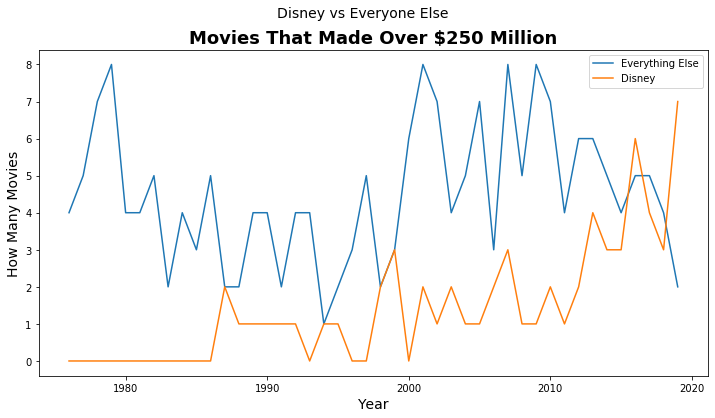

In [58]:
plt.figure(
    figsize=(12,6))
x = disneyrise['year']
y_1 = disneyrise['NotDisney']
y_2 = disneyrise['Disney']
plt.plot(x, y_1, label='Everything Else')
plt.plot(x, y_2, label = 'Disney')
# Add legend
plt.legend(loc='best')
# Add title and x, y labels
plt.title("Movies That Made Over $250 Million", fontsize=18, fontweight='bold')
plt.suptitle("Disney vs Everyone Else", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("How Many Movies", fontsize=14)
plt.show()

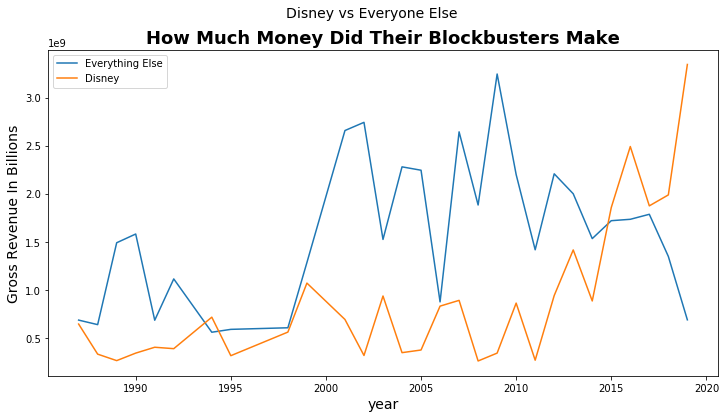

In [59]:
plt.figure(
    figsize=(12,6))
x = TotalGross['year']
y_1 = TotalGross['NotDisneyGross']
y_2 = TotalGross['DisneyGross']
plt.plot(x, y_1, label='Everything Else')
plt.plot(x, y_2, label = 'Disney')
# Add legend
plt.legend(loc='best')

# Add title and x, y labels
plt.title("How Much Money Did Their Blockbusters Make", fontsize=18, fontweight='bold')
plt.suptitle("Disney vs Everyone Else", fontsize=14)
plt.xlabel("year", fontsize=14)
plt.ylabel("Gross Revenue In Billions", fontsize=14)
plt.show()